# 558-reproduce-terarium-calibrate-ensemble-issue-in-notebook

In [1]:
from mira.sources.amr.petrinet import template_model_from_amr_json
import json
config_json_files = ['model-1.json', 'model-2.json', 'model-3.json']

def template_model_from_config_json_file(config_json_file):
    amr_json = amr_dict_from_config_json_file(config_json_file)
    return template_model_from_amr_json(amr_json)
def amr_json_from_config_json_file(config_json_file):
    with open(config_json_file) as c:
        config_dict = json.load(c)
    return config_dict['configuration']
    
amr_json_dicts = [amr_json_from_config_json_file(config_json_file)
            for config_json_file in config_json_files]



    


## Can we sample from these models individually?

In [2]:
from pyciemss.interfaces import sample
samples = [sample(amr_json, 100.0, 1.0, 20)
    for amr_json in amr_json_dicts] 

In [3]:
samples[0]['data']

,timepoint_id,sample_id,timepoint_unknown,persistent_N_param,persistent_beta_param,persistent_d_param,persistent_h_param,persistent_b_param,persistent_f_param,persistent_a_param,persistent_e_param,persistent_c_param,persistent_g_param,D_state,H_state,I_state,R_state,S_state
0,0,0,1.0,150000080.0,0.100187,0.777653,0.129198,0.125765,0.096898,0.089226,0.900435,0.228610,0.870053,6643.095703,40428.792969,138037.109375,2.023845e+04,149794528.0
1,1,0,2.0,150000080.0,0.100187,0.777653,0.129198,0.125765,0.096898,0.089226,0.900435,0.228610,0.870053,10230.279297,31428.615234,139078.406250,3.847188e+04,149780800.0
2,2,0,3.0,150000080.0,0.100187,0.777653,0.129198,0.125765,0.096898,0.089226,0.900435,0.228610,0.870053,13036.587891,24767.943359,140126.531250,5.524343e+04,149766832.0
3,3,0,4.0,150000080.0,0.100187,0.777653,0.129198,0.125765,0.096898,0.089226,0.900435,0.228610,0.870053,15265.143555,19841.578125,141181.218750,7.095560e+04,149752784.0
4,4,0,5.0,150000080.0,0.100187,0.777653,0.129198,0.125765,0.096898,0.089226,0.900435,0.228610,0.870053,17066.544922,16200.891602,142242.453125,8.590714e+04,149738592.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,94,19,95.0,150000064.0,0.100799,0.432221,0.129590,0.219895,0.096926,0.077008,0.900247,0.253504,0.870331,99416.335938,25040.921875,335217.125000,1.859128e+06,147681168.0
1976,95,19,96.0,150000064.0,0.100799,0.432221,0.129590,0.219895,0.096926,0.077008,0.900247,0.253504,0.870331,100824.945312,25258.869141,338108.718750,1.888017e+06,147647728.0
1977,96,19,97.0,150000064.0,0.100799,0.432221,0.129590,0.219895,0.096926,0.077008,0.900247,0.253504,0.870331,102245.992188,25478.154297,341018.031250,1.917154e+06,147614128.0
1978,97,19,98.0,150000064.0,0.100799,0.432221,0.129590,0.219895,0.096926,0.077008,0.900247,0.253504,0.870331,103679.226562,25698.775391,343944.187500,1.946543e+06,147580160.0


In [16]:
import pyciemss

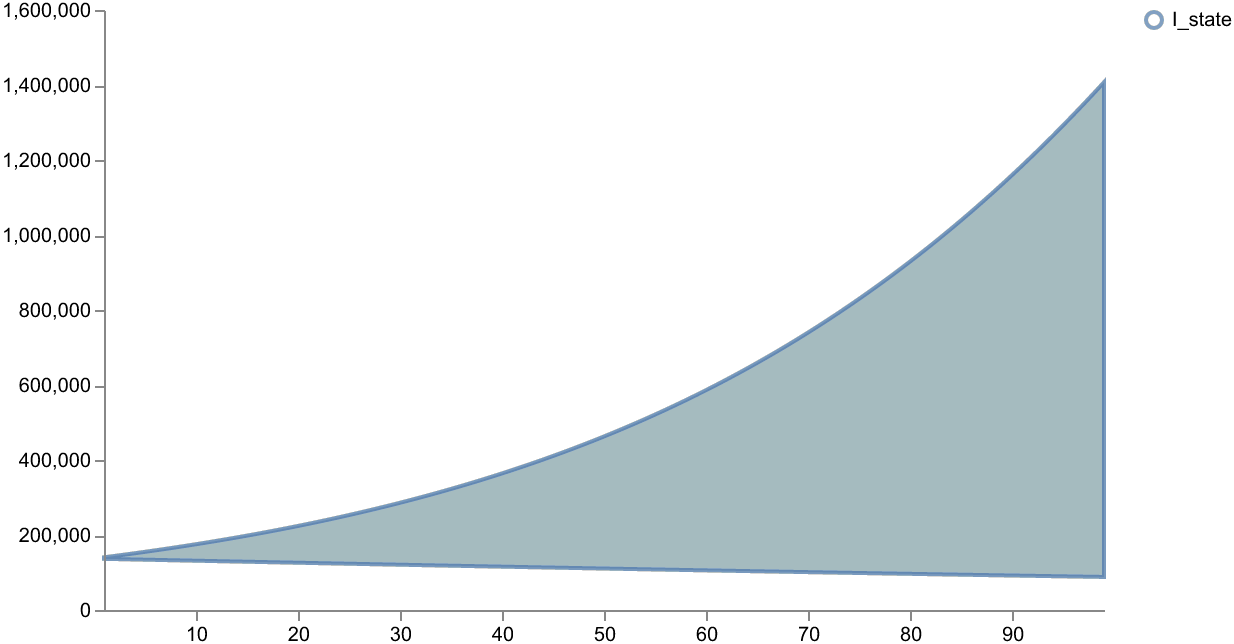

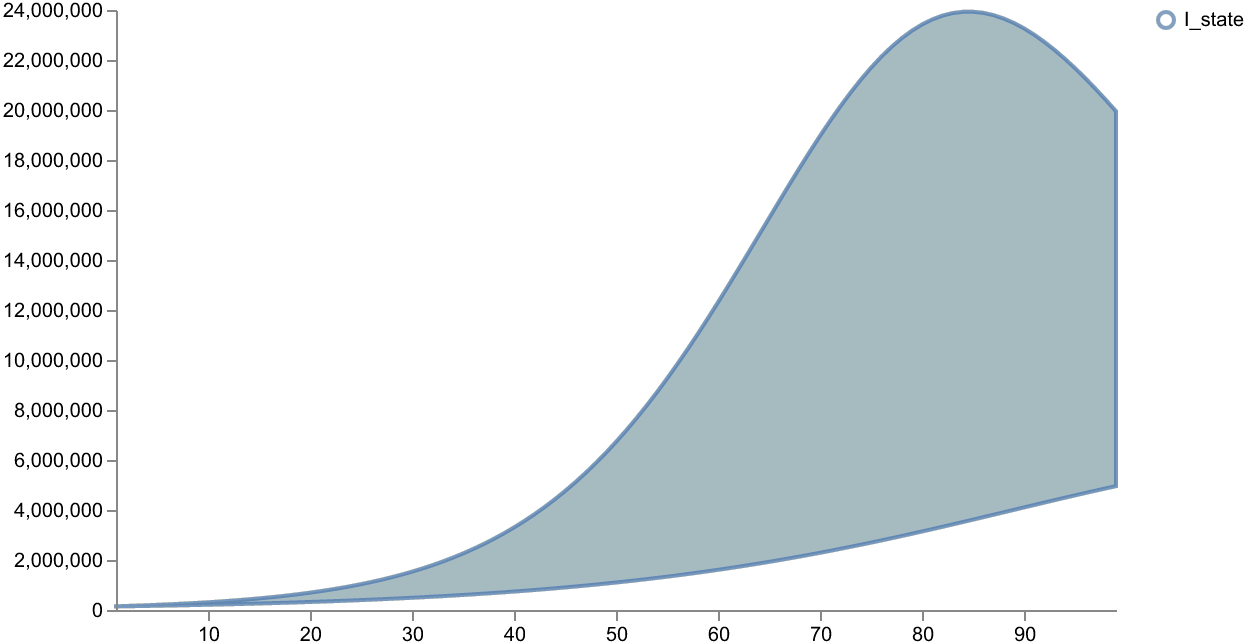

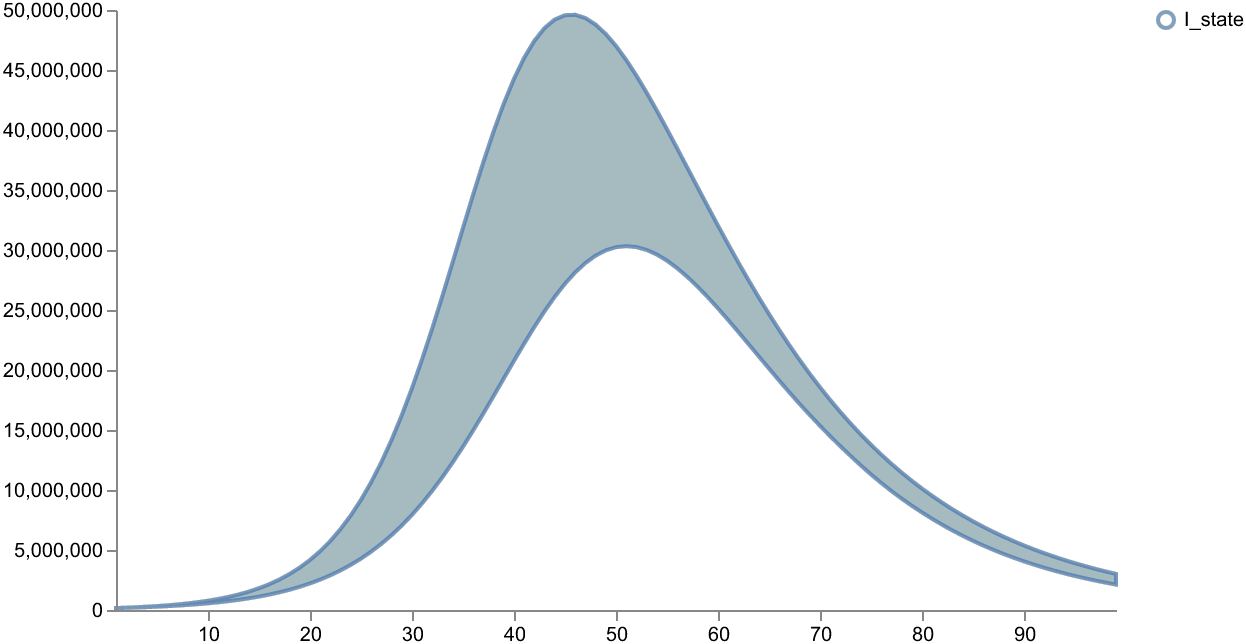

In [4]:
import pyciemss.visuals.plots as plots
for s in samples:
    schema = plots.trajectories(s["data"], keep="I_state")
    display(plots.ipy_display(schema, dpi=150))

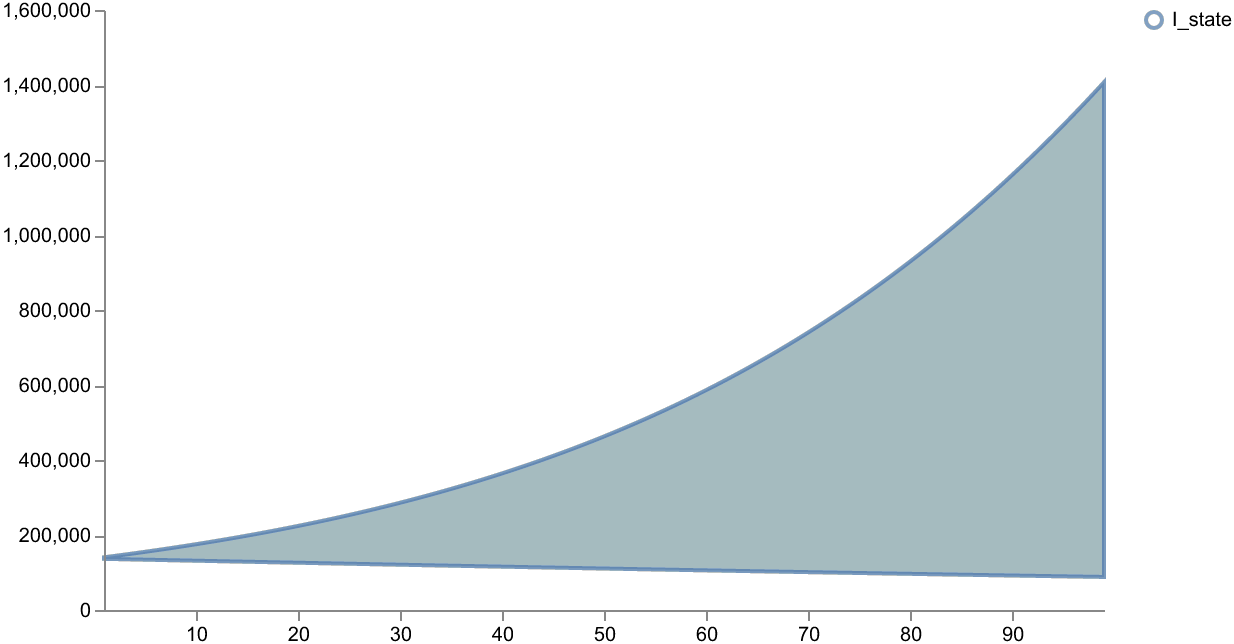

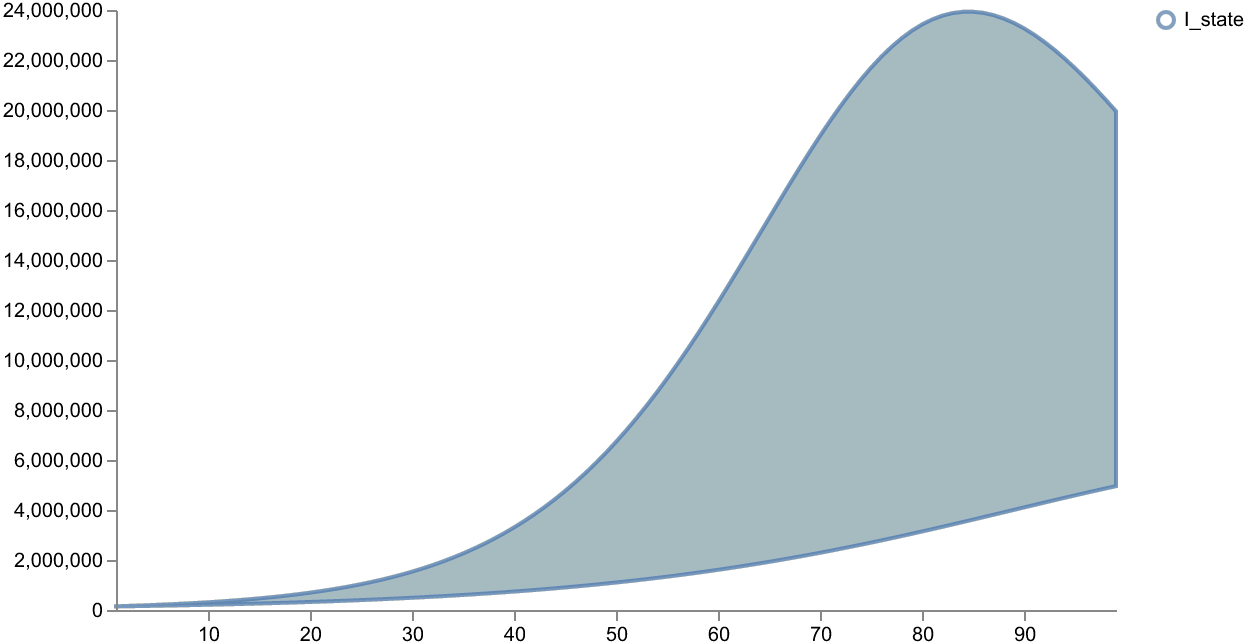

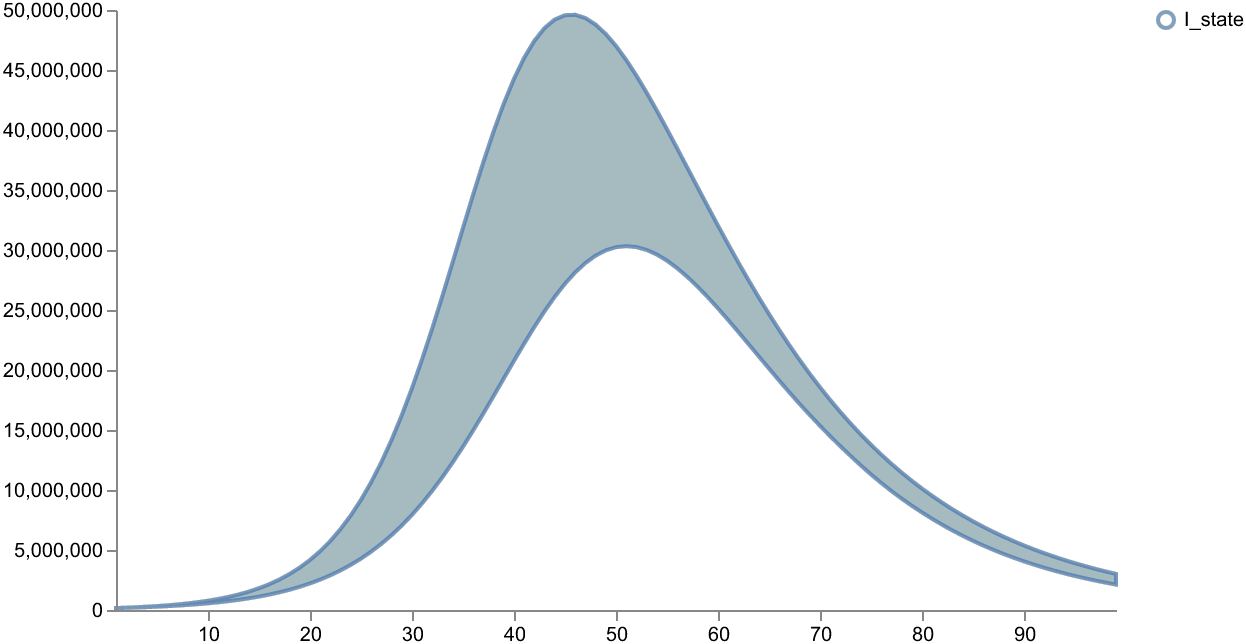

In [5]:
for s in samples:
    schema = plots.trajectories(s["data"], keep="I_state")
    display(plots.ipy_display(schema, dpi=150))

## Can we calibrate these models individually?

First we need to clean the data set.

In [6]:
import pandas as pd
df = pd.read_csv('ensemble_calibrate_data.csv')
df2 = df.rename(columns={'timestamp': 'Timestamp'})
df3 = df2.drop(columns=['date'])
df3.to_csv('cleaned_ensemble_calibrate.csv', index=False )
df3

,Timestamp,I,D,H
0,1,137912,3940,52822.0
1,2,157998,1610,53588.0
2,3,67808,700,53797.0
3,4,56562,412,54874.0
4,5,174919,1425,56687.0
5,6,112469,1513,58121.0
6,7,149378,1821,58893.0
7,8,123935,1553,59505.0
8,9,157415,1753,60286.0
9,10,57742,624,60073.0


In [9]:
%%time
from pyciemss.interfaces import calibrate
num_iterations = 10
inferred_parameters = [
    calibrate(amr_json, 'cleaned_ensemble_calibrate.csv', 
            num_iterations=num_iterations)
    for amr_json in amr_json_dicts] 

/Users/zuck016/Projects/ASKEM/build/pyciemss/pyciemss/integration_utils/observation.py:49: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  if not data_df.applymap(lambda x: isinstance(x, (int, float))).all().all():


Data printout: This dataset contains 29 rows of data. The first column, Timestamp, begins at 1 and ends at 30. The subsequent columns are named: I, D, H


/Users/zuck016/Projects/ASKEM/build/pyciemss/pyciemss/integration_utils/observation.py:49: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  if not data_df.applymap(lambda x: isinstance(x, (int, float))).all().all():


Data printout: This dataset contains 29 rows of data. The first column, Timestamp, begins at 1 and ends at 30. The subsequent columns are named: I, D, H


/Users/zuck016/Projects/ASKEM/build/pyciemss/pyciemss/integration_utils/observation.py:49: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  if not data_df.applymap(lambda x: isinstance(x, (int, float))).all().all():


Data printout: This dataset contains 29 rows of data. The first column, Timestamp, begins at 1 and ends at 30. The subsequent columns are named: I, D, H
CPU times: user 1min 35s, sys: 1.24 s, total: 1min 37s
Wall time: 36.6 s


In [10]:
%%time
from pyciemss.interfaces import sample
calibrated_samples = [sample(
    amr_json, 100.0, 1.0, 20, 
    inferred_parameters=inferred_parameters[i]['inferred_parameters'])
    for i, amr_json in enumerate(amr_json_dicts)]

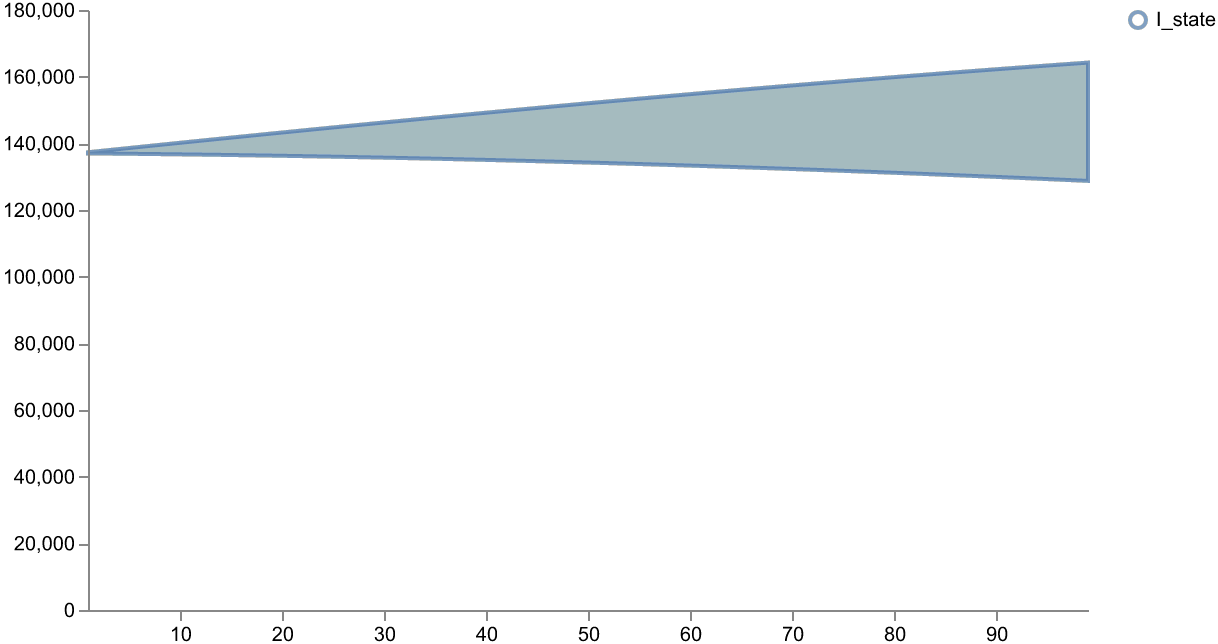

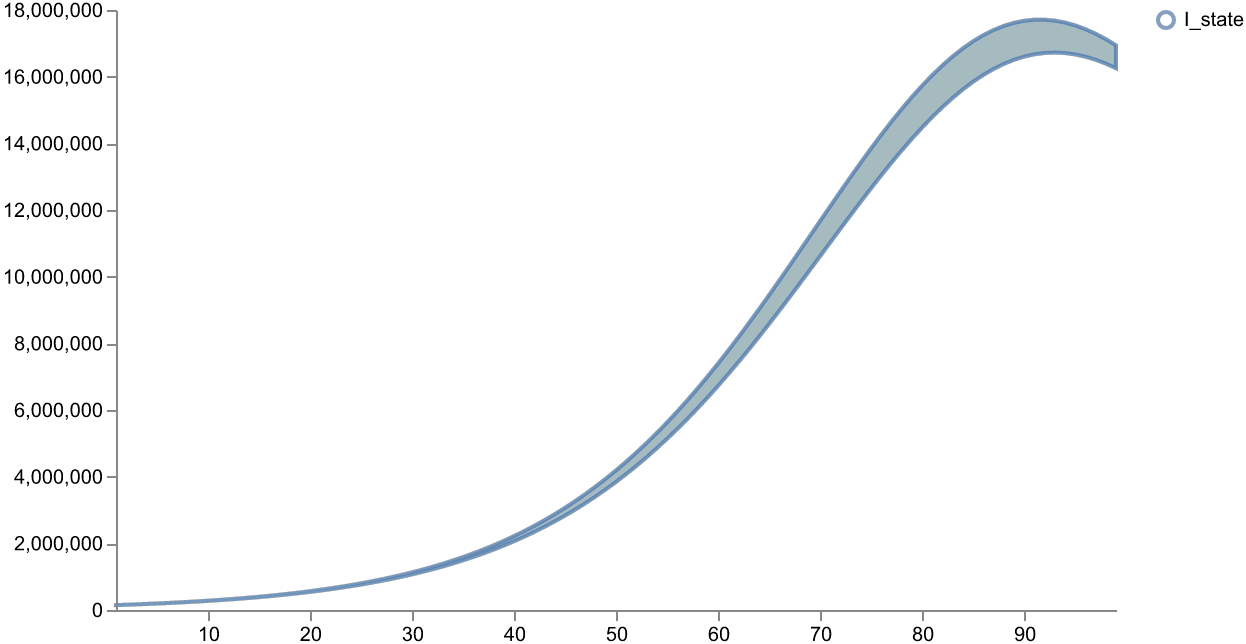

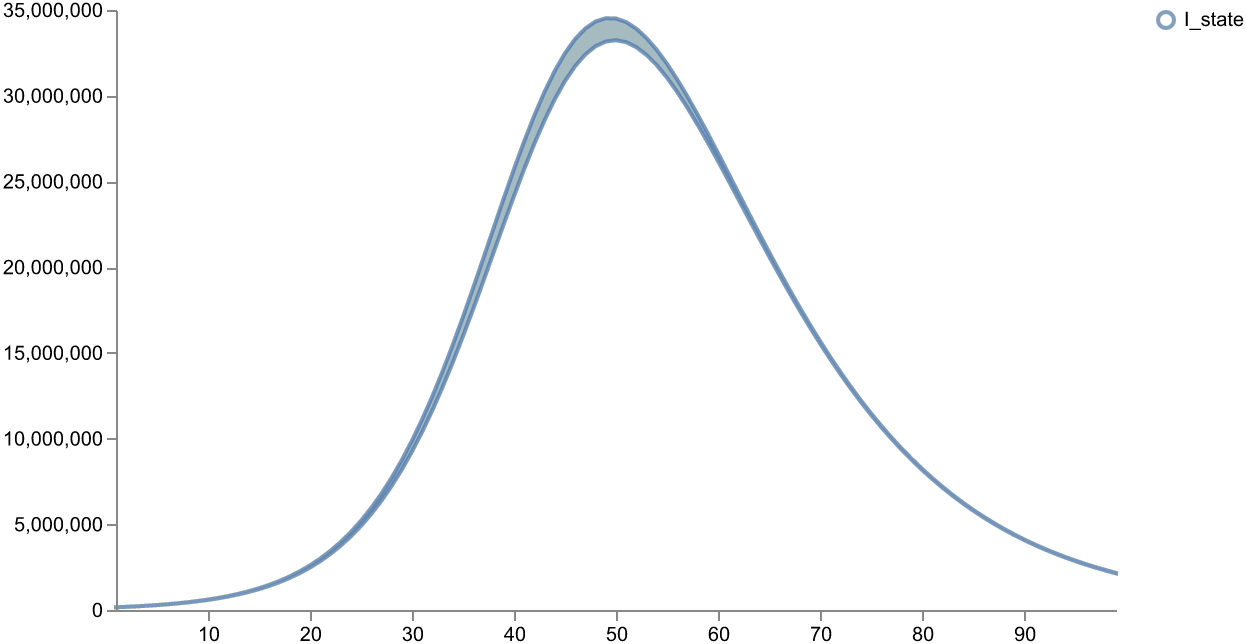

In [11]:
for s in calibrated_samples:
    schema = plots.trajectories(s["data"], keep="I_state")
    display(plots.ipy_display(schema, dpi=150))
    

## Can we ensemble sample?

In [17]:
%%time
import pyciemss
from pyciemss import ensemble_sample
solution_mappings = [lambda x : x, 
                     lambda x : x,
                     lambda x: x,
                    ] # Conveniently, these two models operate on exactly the same state space, with the same names.

ensemble_traj = ensemble_sample(amr_json_dicts, solution_mappings,
                100, 1.0, 20)
            

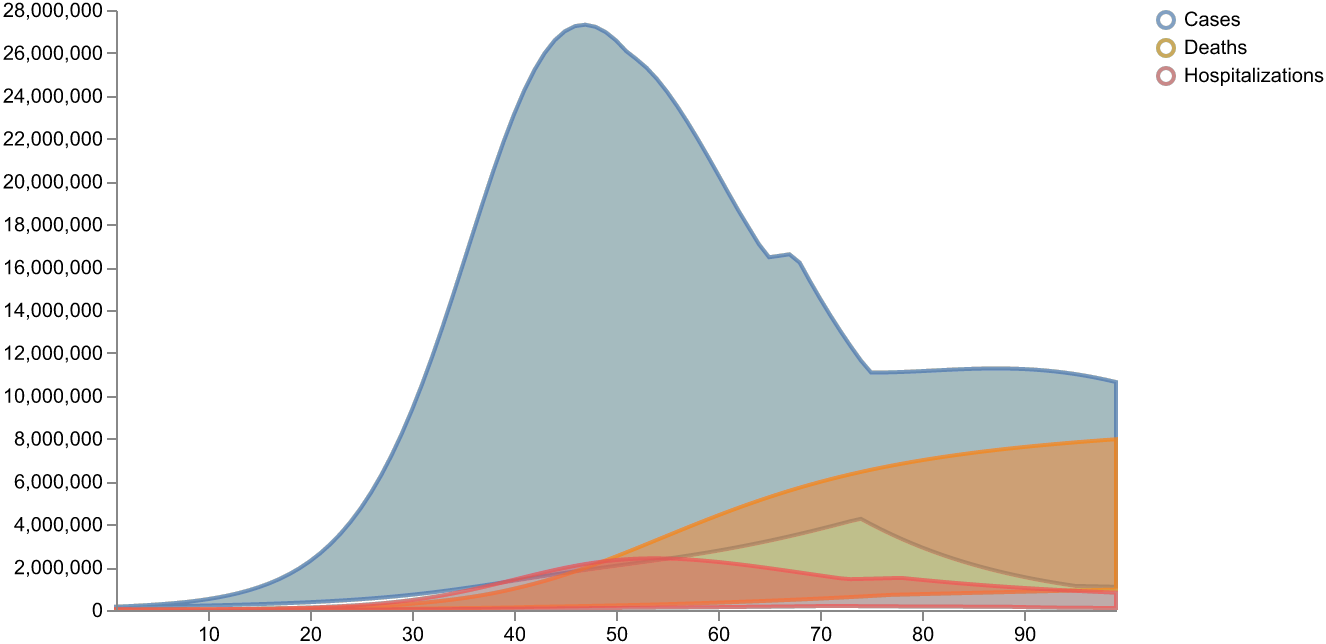

In [13]:
# Plot the ensemble result for cases, hospitalizations, and deaths
nice_labels={"D_state": "Deaths", 
                 "H_state": "Hospitalizations",
                 "I_state": "Cases"
                }
schema = plots.trajectories(ensemble_traj["data"], 
                           keep=["I_state", "H_state", "D_state"], 
                           relabel=nice_labels,
                          )
plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema, dpi=150)

## now with ensemble calibrate

In [19]:
%%time

num_iterations =  10
data_mapping = {'I': 'I', 'H': 'H', 'D': 'D'}
dataset1 = 'cleaned_ensemble_calibrate.csv'
calibrated_results = pyciemss.ensemble_calibrate(amr_json_dicts, solution_mappings,
                                                 dataset1, data_mapping=data_mapping, num_iterations=num_iterations)
parameter_estimates = calibrated_results["inferred_parameters"]


/Users/zuck016/Projects/ASKEM/build/pyciemss/pyciemss/integration_utils/observation.py:49: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  if not data_df.applymap(lambda x: isinstance(x, (int, float))).all().all():


Data printout: This dataset contains 29 rows of data. The first column, Timestamp, begins at 1 and ends at 30. The subsequent columns are named: I, D, H
CPU times: user 58 s, sys: 896 ms, total: 58.9 s
Wall time: 37 s


In [21]:
%%time
from pyciemss import ensemble_sample
solution_mappings = [lambda x : x, 
                     lambda x : x,
                     lambda x: x,
                    ] # Conveniently, these two models operate on exactly the same state space, with the same names.

ensemble_traj = ensemble_sample(
    amr_json_dicts, solution_mappings,
    100, 1.0, 20, inferred_parameters=parameter_estimates)
            

CPU times: user 11.7 s, sys: 47.1 ms, total: 11.8 s
Wall time: 10.8 s


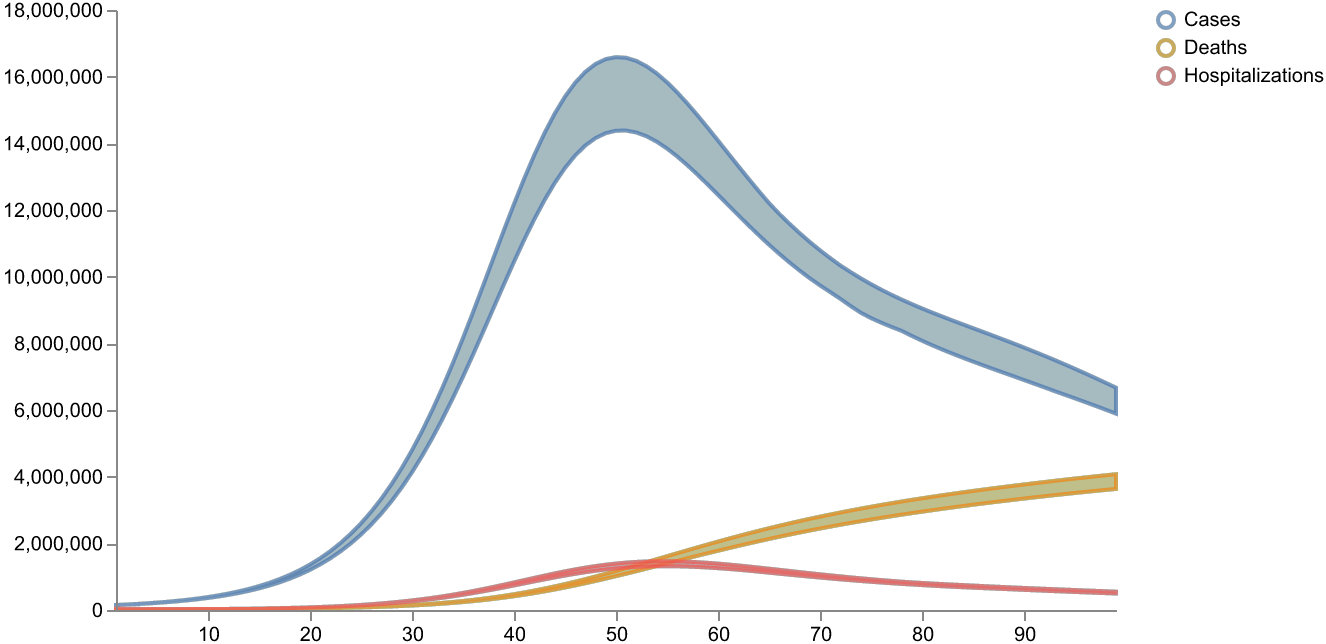

In [22]:
nice_labels={"D_state": "Deaths", 
                 "H_state": "Hospitalizations",
                 "I_state": "Cases"
                }
schema = plots.trajectories(ensemble_traj["data"], 
                           keep=["I_state", "H_state", "D_state"], 
                           relabel=nice_labels,
                          )
plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema, dpi=150)

# Experiments

## Interventions on age-stratified parameters


In [ ]:
import pyciemss, os

In [ ]:
from typing import Dict, Callable
from collections import defaultdict
from mira.metamodel.template_model import TemplateModel
from mira.sources.amr import model_from_url, model_from_json_file

def create_intervention(
    model: TemplateModel, 
    interventions: Dict[float, Dict[str, Callable[str, float]]]
    ) -> Dict[str, str]:
    """Create an intervention to apply to a set of parameters at a particular time.
    Return a timeseries dictionary for AMR serialization."""
    timeseries = defaultdict(list)
    for intervention_time, intervention in interventions.items():
        for intervention_name, intervention_fn in intervention.items():
            intervention_value = intervention_fn(intervention_name)
            timeseries[intervention_name].append( f'{intervention_time:.1f}:{intervention_value:.3f}')
    return {kk: ', '.join(vv) for kk, vv in timeseries.items()}        
    
    #return {'beta_0': '0.0:0.4, 20.0:0.3, 40.0:0.2'}
    
def test_create_intervention(mira_template: TemplateModel, interventions: Dict[float, Dict[str, Callable[str, float]]] ):
    expected_timeseries = {'beta_0': '0.0:0.160, 20.0:0.120, 40.0:0.080'}
    actual_timeseries = create_intervention( mira_template, interventions )
    assert expected_timeseries == actual_timeseries

def scale_parameter(mira_template: TemplateModel, scale: float)-> Callable[str,float]:
    """Return a partial function that takes the amr parameter name and scales it."""
    return lambda x: mira_template.parameters[x].value*scale
  

In [ ]:
MODELS= 'https://raw.githubusercontent.com/DARPA-ASKEM/simulation-integration/main/data/models/'
SEIRD = os.path.join(MODELS, 'SEIRD_base_model01_petrinet.json')
model_config = model_from_url(SEIRD)
interventions = {
    0.0:  {'beta_0': scale_parameter(model_config, 0.4)},
    20.0: {'beta_0': scale_parameter(model_config, 0.3)},
    40.0: {'beta_0':  scale_parameter(model_config, 0.2)}
}
                    
test_create_intervention(model_config, interventions)
amr_json = {'metadata': {'timeseries'}}
amr_json['metadata']['timeseries'] = create_intervention( 
    model_config, interventions)
    
print(amr_json['metadata']['timeseries'])

## Underflow in population

In [ ]:
import pyro
import pyro.distributions as dist
population = dist.Uniform(low=150000000.0, high=150000008.000000014901161193)